<center>
  <img src="images/meme.png">
</center>

# Машинное обучение  
> Компьютерная программа обучается на основе опыта $E$ по отношению к некоторому классу задач $T$ и меры качества $P$, если качество решения задач из $T$, измеренное на основе $P$, улучшается с приобретением опыта $E$. (Т. М. Митчелл)

### Формулировка задачи:  
$X$ $-$ множество объектов  
$Y$ $-$ множество меток классов  
$f: X \rightarrow Y$ $-$ неизвестная зависимость  
**Дано**:  
$x_1, \dots, x_n \subset X$ $-$ обучающая выборка  
$y_i = f(x_i), i=1, \dots n$ $-$ известные метки классов  
**Найти**:  
$a∶ X \rightarrow Y$ $-$ алгоритм, решающую функцию, приближающую $f$ на всём множестве $X$.

In [0]:
!conda install -c intel scikit-learn -y

In [0]:
import numpy
import matplotlib.pyplot as plt 
from sklearn.datasets import load_iris

import warnings
warnings.simplefilter('ignore')

numpy.random.seed(7)

%matplotlib inline

In [12]:
iris = load_iris()
X = iris.data
Y = iris.target
print(X.shape)

random_sample = numpy.random.choice(X.shape[0], 10)
for i in random_sample:
    print(f"{X[i]}: {iris.target_names[Y[i]]}")

(150, 4)
[5.  3.  1.6 0.2]: setosa
[5.8 2.7 4.1 1. ]: versicolor
[6.3 2.9 5.6 1.8]: virginica
[5.8 2.6 4.  1.2]: versicolor
[5.8 2.7 5.1 1.9]: virginica
[5.1 3.3 1.7 0.5]: setosa
[6.3 2.5 4.9 1.5]: versicolor
[5.5 2.5 4.  1.3]: versicolor
[6.5 3.2 5.1 2. ]: virginica
[4.4 3.2 1.3 0.2]: setosa


## Типы задач

### Задача классификации

$Y = \{ -1, +1 \}$ $-$ классификация на 2 класса;  
$Y = \{1, \dots , K \}$ $-$ на $K$ непересекающихся классов;  
$Y = \{0, 1 \}^K$ $-$ на $K$ классов, которые могут пересекаться.

Примеры: распознавание текста по рукописному вводу, определение предмета на фотографии.

### Задача регрессии

$Y = \mathbb{R}$ или $Y = \mathbb{R}^k$.

Примеры: предсказание стоимости акции через полгода, предсказание прибыли магазина в следующем месяце.

### Задача ранжирования

$Y$ $-$ конечное упорядоченное множество.

Пример: выдача поискового запроса.

### Задачи уменьшения размерности

Научиться описывать данные не $M$ признаками, а меньшим числом для повышения точности модели или последующей визуализации. В качестве примера помимо необходимости для визуализации можно привести сжатие данных.

### Задачи кластеризации

Разбиение данных множества объектов на подмножества (кластеры) таким образом, чтобы объекты из одного кластера были более похожи друг на друга, чем на объекты из других кластеров по какому-либо критерию. 

<center>
    <img src="images/ml_map.png">
</center>

In [13]:
from sklearn.svm import SVC

model = SVC(random_state=7)
model.fit(X, Y)
y_pred = model.predict(X)

for i in random_sample:
    print(f"predicted: {iris.target_names[y_pred[i]]}, actual: {iris.target_names[Y[i]]}")
    
f"differences in {(Y != y_pred).sum()} samples"

predicted: setosa, actual: setosa
predicted: versicolor, actual: versicolor
predicted: virginica, actual: virginica
predicted: versicolor, actual: versicolor
predicted: virginica, actual: virginica
predicted: setosa, actual: setosa
predicted: versicolor, actual: versicolor
predicted: versicolor, actual: versicolor
predicted: virginica, actual: virginica
predicted: setosa, actual: setosa


'differences in 4 samples'

# Оценка качества

## Метрика

### Задача классификации

Определим матрицу ошибок. Допустим, что у нас есть два класса и алгоритм, предсказывающий принадлежность каждого объекта одному из классов, тогда матрица ошибок классификации будет выглядеть следующим образом:

| $ $         | $y=1$               | $y=0$               |  
|-------------|---------------------|---------------------|  
| $\hat{y}=1$ | True Positive (TP)  | False Positive (FP) |  
| $\hat{y}=0$ | False Negative (FN) | True Negative (TN)  |  

Здесь $\hat{y}$ $-$ это ответ алгоритма на объекте, а $y$ $-$ истинная метка класса на этом объекте.  
Таким образом, ошибки классификации бывают двух видов: *False Negative (FN)* и *False Positive (FP)*.

- $\textit{accuracy} = \frac{TP + TN}{TP + FP + FN + TN}$
- $\textit{recall} = \frac{TP}{TP + FN}$
- $\textit{precision} = \frac{TP}{TP + FP}$
- $\textit{f1-score} = \frac{2 \cdot \textit{recall} \cdot \textit{precision}}{\textit{precision} + \textit{recall}}$

### Задача регрессии

- $MSE = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2$
- $RMSE = \sqrt{MSE}$
- $MAE = \frac{1}{n} \sum_{i=1}^n |y_i - \hat{y}_i|$

## Отложенная выборка

$X \rightarrow X_{train}, X_{val}, X_{test}$

- $X_{train}$ $-$ используется для обучения модели
- $X_{val}$ $-$ подбор гиперпараметров ($ \approx{30\%}$ от тренировочной части)
- $X_{test}$ $-$ оценка качества конечной модели

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

# 1/3 всего датасета возьмём для тестовой выборки
# затем 30% от тренировочной будет валидационной
test_index = numpy.random.choice(X.shape[0], X.shape[0] // 3)
train_index = [i for i in range(X.shape[0]) if i not in test_index]

X_test = X[test_index]
Y_test = Y[test_index]

X_train, X_val, Y_train, Y_val = train_test_split(X[train_index], Y[train_index], test_size=0.3, shuffle=True, random_state=7)

print(f"train size: {X_train.shape[0]}")
print(f"val size: {X_val.shape[0]}")
print(f"test size: {X_test.shape[0]}")

train size: 76
val size: 33
test size: 50


In [17]:
best_score = -1
best_c = None

for c in [0.01, 0.1, 0.98, 1, 1.01, 10]:
    model = SVC(C=c, random_state=7)
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_val)
    cur_score = f1_score(Y_val, y_pred, average='micro')
    if cur_score > best_score:
        best_score = cur_score
        best_c = c

f"best score is {best_score} for C {best_c}"

'best score is 0.9696969696969697 for C 0.98'

In [18]:
full_model = SVC(C=0.98, random_state=7)
full_model.fit(X[train_index], Y[train_index])
y_pred = full_model.predict(X_test)
f"test score is {f1_score(Y_test, y_pred, average='micro')}"

'test score is 0.94'

# Алгоритмы классификации

## Линейный классификатор

Построение разделяющей гиперплоскости

$$
y = \textit{sign}(Wx + b)
$$

<center>
    <img src="images/linear_classifier.png">
</center>

### Стандартизация величин

При использование линейных моделей, иногда полезно стандартизировать их значения, например, оценки пользователей.

$$
X_{stand} = \frac{X - X_{mean}}{X_{std}}
$$

Для этого в `sklearn` есть класс $-$ `StandartScaler`


### Логистическая регрессия

Использование функции логита для получения вероятности

<center>
    <img src="images/logit.png">
</center>

## Метод опорных векторов (Support vector machine)

Построение "полоски" максимальной ширины, которая разделяет выборку

<center>
    <img src="images/svm.png">
</center>


## Дерево решений (Decision tree)

В каждой вершине определяется критерий, по которому разбивается подвыборка.

<center>
    <img src="images/decision_tree.png">
</center>

## Случайный лес (Random forest)

Множество деревьев решений, каждое из которых обучается на случайной подвыборке.

<center>
    <img src="images/random_forest.png">
</center>

## Метод ближайших соседей (K-neighbors)

Решение базируется на основе $k$ ближайших известных примеров.

<center>
    <img src="images/knn.png">
</center>

In [0]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=50, n_informative=20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=7)

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

models = [
    LogisticRegression(random_state=7, n_jobs=6),
    SVC(random_state=7),
    DecisionTreeClassifier(random_state=7),
    RandomForestClassifier(random_state=7),
    KNeighborsClassifier(n_jobs=6)
]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"model {model.__class__.__name__} scores {round(f1_score(y_test, y_pred, average='micro'), 2)}")

model LogisticRegression scores 0.81
model SVC scores 0.92
model DecisionTreeClassifier scores 0.7
model RandomForestClassifier scores 0.85
model KNeighborsClassifier scores 0.91


In [21]:
from sklearn.preprocessing import StandardScaler

standart_scaler = StandardScaler()
standart_scaler.fit(X_train)
X_train_scaled = standart_scaler.transform(X_train)
X_test_scaled = standart_scaler.transform(X_test)

model = SVC(random_state=7)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
f"test score is {f1_score(y_test, y_pred, average='micro')}"

'test score is 0.8633333333333333'

# Inclass task #1

Реализуйте модель, которая классифицирует цифры по рисунку.

Ваша задача получить f1-score $0.98$ на тестовом датасете.

Можете пользоваться как алгоритмами выше, так и любыми другими реализованными в `sklearn`.

In [22]:
from sklearn.datasets import fetch_openml

# Load data from https://www.openml.org/d/554
X, Y = fetch_openml('mnist_784', return_X_y=True)
print(f"shape of X is {X.shape}")

shape of X is (70000, 784)


<Figure size 432x288 with 0 Axes>

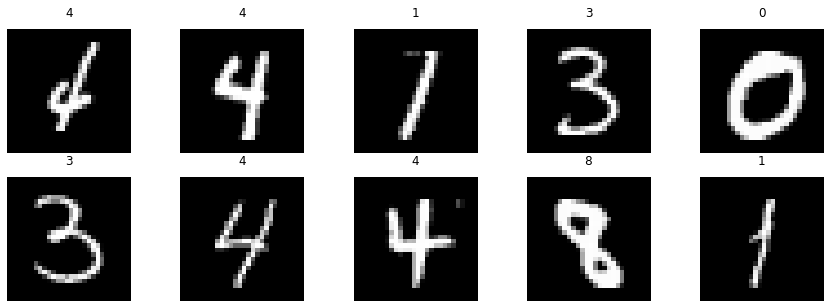

In [23]:
plt.gray()
fig, axes = plt.subplots(2, 5, figsize=(15, 5))

for i, num in enumerate(numpy.random.choice(X.shape[0], 10)):
    axes[i // 5, i % 5].matshow(X[num].reshape(28, 28))
    axes[i // 5, i % 5].set_title(Y[num])
    axes[i // 5, i % 5].axis('off')

plt.show()

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

test_index = numpy.arange(10000)
train_index = numpy.arange(10000, 70000)

X_test = X[test_index]
Y_test = Y[test_index]

X_train, X_val, Y_train, Y_val = train_test_split(X[train_index], Y[train_index], test_size=0.3, shuffle=True, random_state=7)

print(f"train size: {X_train.shape[0]}")
print(f"val size: {X_val.shape[0]}")
print(f"test size: {X_test.shape[0]}")

train size: 42000
val size: 18000
test size: 10000


In [36]:
from sklearn.linear_model import LogisticRegression

best_score = -1
best_c = None

for c in [10]:
    model = SVC(C=10, cache_size=10240, random_state=7)
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_val)
    cur_score = f1_score(Y_val, y_pred, average='micro')
    if cur_score > best_score:
        best_score = cur_score
        best_c = c
    print(f"C: {c}, cur_score: {cur_score}, best_score: {best_score}")

y_pred = model.predict(X_test)
print(f"test score is {f1_score(Y_test, y_pred, average='micro')}")

C: 10, cur_score: 0.9827222222222223, best_score: 0.9827222222222223
test score is 0.9824


In [29]:
y_pred = model.predict(X_test)
print(f"test score is {f1_score(Y_test, y_pred, average='micro')}")

test score is 0.9637


# Алгоритмы регрессии

Деревья решений, случайный лес и метод ближайших соседей легко обобщаются на случай регрессии. Ответ, как правило, это среднее из полученных значений (например, среднее значение ближайших примеров). 

## Линейная регрессия

$y$ линейно зависим от $x$, т.е. имеет место уравнение
$$
y = Wx + b = W <x; 1>
$$

Такой подход имеет аналитическое решение, однако он требует вычисление обратной матрицы $X$, что не всегда возможно.  
Другой подход $-$ минимизация функции ошибки, например $MSE$, с помощью техники градиентного спуска.

## Регуляризация

Чтобы избегать переобучения (когда модель хорошо работает только на тренировочных данных) используют различные техники *регуляризации*.  
Один из признаков переобучения $-$ модель имеет большие веса, это можно контролировать путём добавления $L1$ или $L2$ нормы весов к функции ошибки.  
То есть, итоговая ошибка, которая будет распространятся на веса модели, считается по формуле:
$$
Error(W) = MSE(W, X, y) + \lambda ||W||
$$

Такие модели, так же реализованы в `sklearn`:
- Lasso
- Ridge

In [0]:
from sklearn.datasets import load_boston

X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=7)

In [0]:
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

models = [
    Lasso(random_state=7),
    Ridge(random_state=7),
    LinearRegression(n_jobs=6),
    RandomForestRegressor(random_state=7, n_jobs=6),
    KNeighborsRegressor(n_jobs=6),
    SVR()
]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"model {model.__class__.__name__} scores {round(mean_squared_error(y_test, y_pred), 2)}")

# Inclass task #2

Реализуйте модель, которая предсказывает стоимость медицинской страховки. В данных есть текстовые бинарные признаки (`sex` и `smoker`), не забудьте конвертировать их в `0` и `1`. Признак `region` имеет $4$ разных значения, вы можете конвертировать их в числа $0-4$ или создать $4$ бинарных признака. Для этого вам может помочь `sklearn.preprocessing.LabelEncoder` и `pandas.get_dummies`.

Ваша задача получить RMSE-score меньше $5000$ на тестовом датасете.

Можете пользоваться как алгоритмами выше, так и любыми другими реализованными в `sklearn`.

In [0]:
def rmse(y_true, y_pred):
    return numpy.sqrt(mean_squared_error(y_true, y_pred))

In [0]:
import pandas

data = pandas.read_csv('data/insurance.csv')

data.head()

In [0]:
X = data.drop(['charges'], axis=1)
y = data['charges'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=7)
print(f"train size: {X_train.shape[0]}")
print(f"test size: {X_test.shape[0]}")

In [0]:
model = None

####### Your code here #######

In [0]:
y_pred = model.predict(X_test)
print(f"test score is {rmse(y_test, y_pred)}")